In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data
df = pd.read_csv('youtube.csv')

# view data
df.head()


,RANK,NAME_OF_CHANNEL,TOTAL_NUMBER_OF_VIDEOS,SUBSCRIBERS,VIEWS,CATEGORY
0,#1,MrBeast,799,274M,50.98B,Entertainment
1,#2,T-Series,21.12K,267M,257.16B,Music
2,#3,Cocomelon - Nursery Rhymes,1.18K,176M,182.88B,Kids
3,#4,SET India,138.97K,173M,164.71B,Entertainment
4,#5,✿ Kids Diana Show,1.22K,123M,103.5B,Kids


In [ ]:
# infos of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 493 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   RANK                    493 non-null    object
 1   NAME_OF_CHANNEL         493 non-null    object
 2   TOTAL_NUMBER_OF_VIDEOS  493 non-null    object
 3   SUBSCRIBERS             493 non-null    object
 4   VIEWS                   493 non-null    object
 5   CATEGORY                493 non-null    object
dtypes: object(6)
memory usage: 43.1+ KB


In [ ]:
# check the data for null values
df.isnull().sum()

RANK                      0
NAME_OF_CHANNEL           7
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  8
dtype: int64

In [ ]:
# lets clean the data with null values

# we can drop the rows which doesnt have channel names
df = (df.dropna(subset=['NAME_OF_CHANNEL']))

# add value 'general' to the null values in 'category' column
df['CATEGORY'] = df['CATEGORY'].fillna('general')
df.isnull().sum()

RANK                      0
NAME_OF_CHANNEL           0
TOTAL_NUMBER_OF_VIDEOS    0
SUBSCRIBERS               0
VIEWS                     0
CATEGORY                  0
dtype: int64

In [ ]:
# remove the alphabets from rank
df['RANK'] = df['RANK'].str.replace('#', '')
df['RANK'] = pd.to_numeric(df['RANK'])
df.dtypes


RANK                       int64
NAME_OF_CHANNEL           object
TOTAL_NUMBER_OF_VIDEOS    object
SUBSCRIBERS               object
VIEWS                     object
CATEGORY                  object
dtype: object

In [30]:

df = pd.read_csv('youtube.csv')
# lets change the dtype of rank, total no. of vds, subscribers, and views to numerics
# remove the alphabets from total no. of vds, subscribers, and views
df['TOTAL_NUMBER_OF_VIDEOS'] = pd.to_numeric(df['TOTAL_NUMBER_OF_VIDEOS'].str.replace(r'[k,K]','', regex=True))

df['SUBSCRIBERS'] = pd.to_numeric(df['SUBSCRIBERS'].str.replace(r'[M,K]', '', regex=True))

df['VIEWS'] = pd.to_numeric(df['VIEWS'].str.replace(r'[MBK]', '', regex=True))

df.dtypes



RANK                        int64
NAME_OF_CHANNEL            object
TOTAL_NUMBER_OF_VIDEOS    float64
SUBSCRIBERS               float64
VIEWS                     float64
CATEGORY                   object
dtype: object

plot a chart showing the popular channel categories

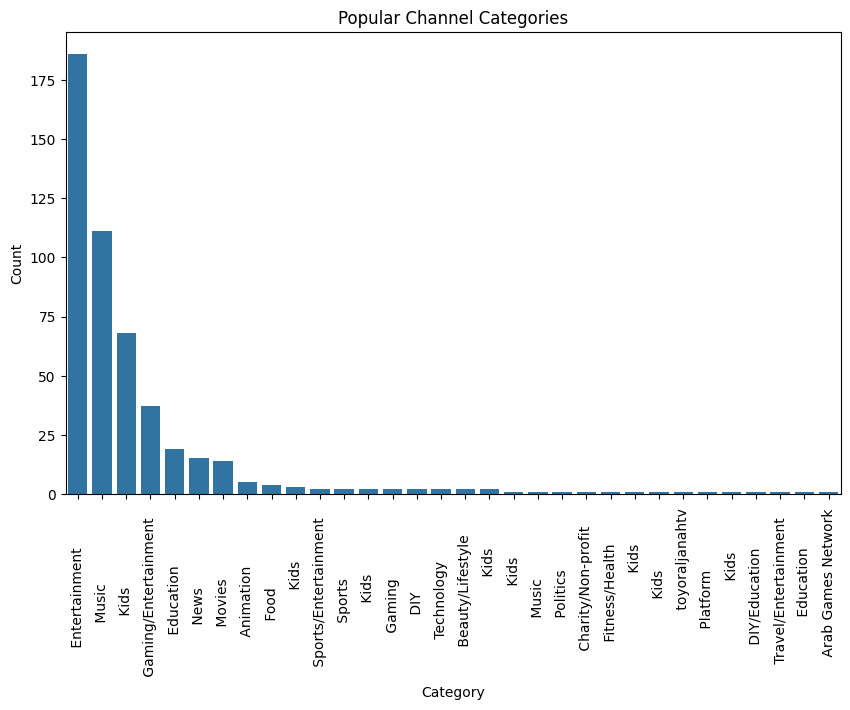

In [7]:
# barplot
cat = df['CATEGORY'].value_counts()

plt.figure(figsize=(10, 6))
sns.countplot(data= df, x='CATEGORY', order=df['CATEGORY'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Popular Channel Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


create a pie chart showing the size of categories

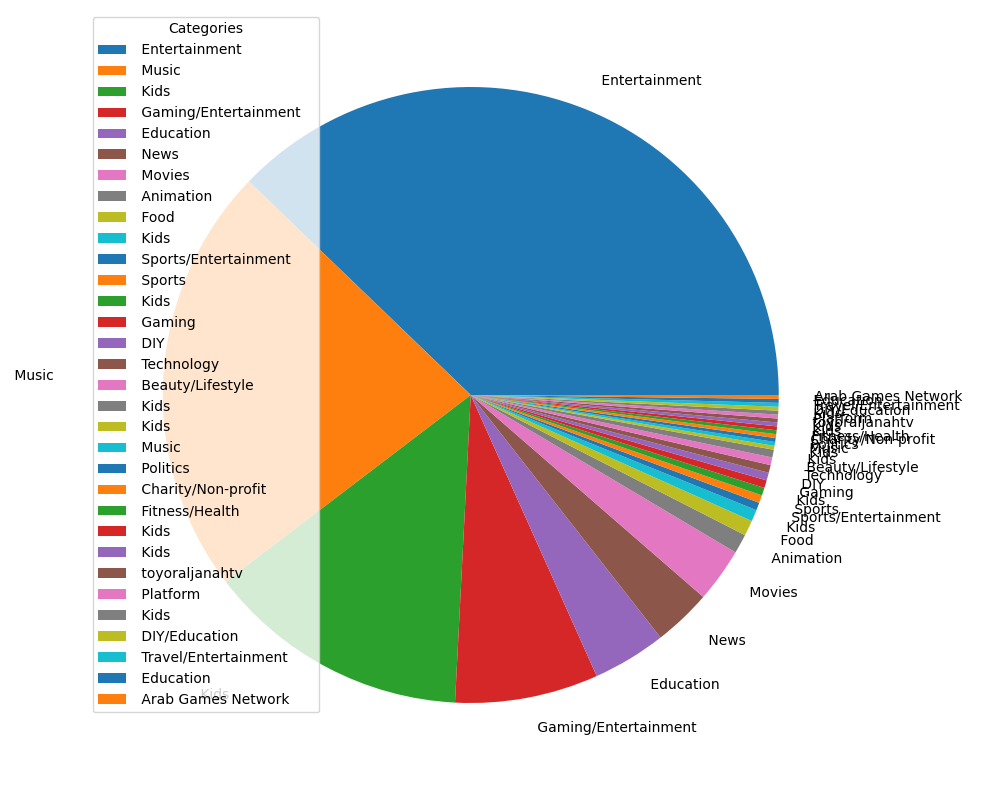

In [21]:
cat = df['CATEGORY'].value_counts()
# pie chart
plt.figure(figsize=(15, 10))
plt.pie(x=cat, labels= cat.index)
plt.legend(title= 'Categories')
plt.show()

plot the 10 most number of videos to a chart

[]

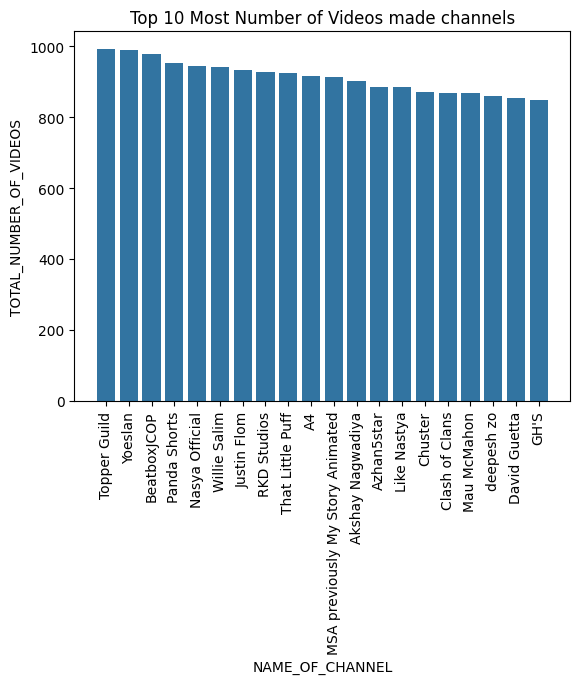

In [50]:
# bar chart showing 10 most number of videos made channels
top20 = df['TOTAL_NUMBER_OF_VIDEOS'].sort_values(ascending=False).head(20)

sns.barplot(y=top20 , x=df.loc[top20.index]['NAME_OF_CHANNEL'] )
plt.xticks(rotation=90)
plt.title('Top 10 Most Number of Videos made channels')
plt.plot()

Top 20 Channels with highest Subscribers

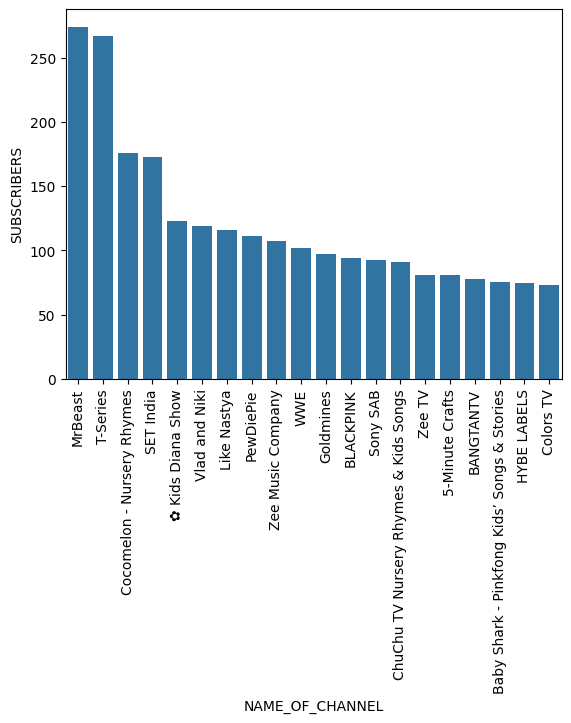

0     274.0
1     267.0
2     176.0
3     173.0
4     123.0
5     119.0
6     116.0
7     111.0
8     107.0
9     102.0
10     97.2
11     93.9
12     92.5
13     91.3
14     80.7
15     80.7
16     78.1
17     75.3
18     74.9
19     73.0
Name: SUBSCRIBERS, dtype: float64

In [52]:
# 20 Channels with highest Subscribers
sub20 = df['SUBSCRIBERS'].sort_values(ascending=False).head(20)

sns.barplot(y=sub20 , x=df.loc[sub20.index]['NAME_OF_CHANNEL'] )
plt.xticks(rotation=90)
plt.show()

correlation between different columns to understand how they are related